# Lab 2 - Data Visualization - 21KHDL

## VNU HCM - University of Science
---

## Member Information
| Name              | ID       |
|-------------------|----------|
| Tran Nguyen Huan  | 21127050 |
| Nguyen Phat Dat   | 21127240 |

# Table of Contents

1. [About Dataset](#About-Dataset)
2. [Import all the necessary libraries](#1.-Import-all-the-necessary-libraries)
3. [Data Exploration](#2.-Data-Exploration)
4. [EDA](#3.-EDA)
5. [Insights](#4.-Insights)
6. [References](#5.-References)

### About Dataset ⛳

This dataset is from a [Netflix prize competition](http://netflixprize.com/index.html) for the best algorithm to predict user ratings for films.

#### Data Description 📁📂

**Movie Dataset**: containing information of various movies uploaded by Netflix that will be useful for further analysis.

**Rating Dataset**: containing ratings of customers for various Netflix's movies

**Source**: [Netflix Movie Rating Dataset](https://www.kaggle.com/netflix-inc/netflix-prize-data)

### 1. Import neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

### 2. Data Exploration

#### Read from local files and save to DataFrames

In [2]:
df_movie = pd.read_csv("../data/Netflix_Dataset_Movie.csv")
df_rating = pd.read_csv("../data/Netflix_Dataset_Rating.csv")

#### How many rows and columns of our datasets?

In [3]:
print(f'The Movie Dataset contains "{df_movie.shape[0]}" rows and "{df_movie.shape[1]}" columns')
print(f'The Rating Dataset contains "{df_rating.shape[0]}" rows and "{df_rating.shape[1]}" columns')

The Movie Dataset contains "17770" rows and "3" columns
The Rating Dataset contains "17337458" rows and "3" columns


#### Get some records from each datasets and explore their meaning

In [4]:
df_movie.head()

Movie_ID  Year                          Name
0         1  2003               Dinosaur Planet
1         2  2004    Isle of Man TT 2004 Review
2         3  1997                     Character
3         4  1994  Paula Abdul's Get Up & Dance
4         5  2004      The Rise and Fall of ECW

Each line (record) corresponds to a Netflix movie with the uploaded year, title and its ID.

In [5]:
df_rating.head()

User_ID  Rating  Movie_ID
0   712664       5         3
1  1331154       4         3
2  2632461       3         3
3    44937       5         3
4   656399       4         3

Each line (record) corresponds to a user's rating to a move with the rating score from 1-5.

#### Meaning of each column of each dataset

There are total of 3 columns in the __Movie Dataset__ represents 3 features, include:

| # | Field Name | Description |
| --- | --- | --- |
| 1 | `Movie_ID` | ID (identification) of a move |
| 2 | `Year` | Release year |
| 3 | `Name` | Title of the movie |

Check if there is any duplicated Movie ID.

In [6]:
df_movie['Movie_ID'].is_unique

True

Good, all the ID are unique. Therefore, we can safely use `Movie_ID` as DataFrame's index. 

In [7]:
df_movie.set_index('Movie_ID', inplace=True)

df_movie.head()

Year                          Name
Movie_ID                                    
1         2003               Dinosaur Planet
2         2004    Isle of Man TT 2004 Review
3         1997                     Character
4         1994  Paula Abdul's Get Up & Dance
5         2004      The Rise and Fall of ECW

There are total of 3 columns in the __Rating Dataset__ represents 3 features, include:

| # | Field Name | Description |
| --- | --- | --- |
| 1 | `User_ID` | ID (identification) of a user |
| 2 | `Rating` | Rating score the user gives to the movie (1-5) |
| 3 | `Movie_ID` | ID (identification) of a move |

Let's verify if the rating scores range again (it should be from 1 to 5).

In [8]:
df_rating['Rating'].unique()

array([5, 4, 3, 1, 2])

#### Check datatypes and missing values

In [9]:
df_movie.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 17770 entries, 1 to 17770
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    17770 non-null  int64 
 1   Name    17770 non-null  object
dtypes: int64(1), object(1)
memory usage: 416.5+ KB


Note that since we've set `Movie_ID` as index, it won't be considered as a column anymore.

In [10]:
df_rating.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337458 entries, 0 to 17337457
Data columns (total 3 columns):
 #   Column    Non-Null Count     Dtype
---  ------    --------------     -----
 0   User_ID   17337458 non-null  int64
 1   Rating    17337458 non-null  int64
 2   Movie_ID  17337458 non-null  int64
dtypes: int64(3)
memory usage: 396.8 MB


Great, looks like there are no missing values in both datasets, and the columns' datatype also seem to be suitable.

#### Identifying duplicate values

In [11]:
df_rating.duplicated(keep=False).sum()

0

In [12]:
df_movie.duplicated(keep=False).sum()

31

There're some duplicated rows from the movie dataset, which means that there're some movies with the same Title and same release year (their id are still different though). 

However, we won't drop or try to aggregate those duplicated values now since these may correspond to different movies and it might affect the rating score also.

In [13]:
# get all duplicated movies (same title and release year)
df_movie[df_movie.duplicated(keep=False)].drop_duplicates(ignore_index=True, inplace=False)

Year                         Name
0   1993                    Dr. Quinn
1   1999                         Girl
2   1996            Last Man Standing
3   1999  The Hunchback of Notre Dame
4   1999                 Now and Then
5   1990                       Hamlet
6   1959     Elvira's Horror Classics
7   2002                     Stranded
8   2004                 Frankenstein
9   1962                The Lucy Show
10  2002                    Pinocchio
11  2001                     Monsters
12  1966                     The Good
13  2000                  Second Skin
14  1989            The Toxic Avenger

#### Additional

In [14]:
df_movie['Year'].describe().astype('int')

count    17770
mean      1990
std         16
min       1915
25%       1985
50%       1997
75%       2002
max       2005
Name: Year, dtype: int64

- The movies in the dataset span from `1915 to 2005`, covering a wide range of years. This suggests that the dataset contains movies from different historical periods, providing a diverse collection for analysis. However, it's outdated now (2024).

- The mean year of the movies in the dataset is around `1990`. This indicates that, on average, the movies in the dataset were released around the early `1990s`.

- The median year is `1997`, which indicates that half of the movies in the dataset were released before `1997` and the other half after. (see same for `25%` and `75%`)

In [15]:
print("Number of movies:", df_movie.shape[0])
print("Unique Values:")
df_movie.nunique()

Number of movies: 17770
Unique Values:


Year       91
Name    17297
dtype: int64

- There are total of `17297` distinct movies' title appeared in the dataset.

- The movies in the dataset span across `91` different years of release.

- The discrepancy between the number of unique movie IDs (`17770`) and unique movie names (`17297`) suggests that there might be some movies with same title but with different release years or even with same title and same release year (as explained above).

Let's see if there exists users who rated a same movie more than 1 time

In [16]:
df_rating[['User_ID', 'Movie_ID']].duplicated(keep=False).sum()

0

Also, for convenience, we will merge those DataFrames into a single DataFrame containing the average rating scores for every movie, joined by the `Movie_ID` attribute. This will help us analyze the movie dataset easier.

In [17]:
df_rating_movie = pd.merge(df_movie, df_rating, on="Movie_ID", how="outer")

# aggregate by movie id
df_rating_movie = df_rating_movie.groupby(['Movie_ID']).agg(
    Avg_Rating=('Rating', 'mean'),
    Rating_Count=('User_ID', 'count')
)

df_ratings_movies_summary = pd.concat([df_movie, df_rating_movie], axis=1)

df_ratings_movies_summary.head()

Year                          Name  Avg_Rating  Rating_Count
Movie_ID                                                              
1         2003               Dinosaur Planet         NaN             0
2         2004    Isle of Man TT 2004 Review         NaN             0
3         1997                     Character    3.621391          1524
4         1994  Paula Abdul's Get Up & Dance         NaN             0
5         2004      The Rise and Fall of ECW         NaN             0

Notice that there're some movies (rows) with NaN values appearing in the `Avg_Rating` column. This is because these movies have no customer rating it, so let's replace those missing values with 0 instead. 

Note that we can safely replace missing values with 0 because the normal rating scores are from 1 to 5 (we can also check for missing rating by using the Rating_Count column).

In [18]:
df_ratings_movies_summary.fillna(0, inplace=True)

df_ratings_movies_summary.head()

Year                          Name  Avg_Rating  Rating_Count
Movie_ID                                                              
1         2003               Dinosaur Planet    0.000000             0
2         2004    Isle of Man TT 2004 Review    0.000000             0
3         1997                     Character    3.621391          1524
4         1994  Paula Abdul's Get Up & Dance    0.000000             0
5         2004      The Rise and Fall of ECW    0.000000             0

### 3. EDA

#### Number of Ratings per User

In [19]:
no_of_rating_per_users = df_rating.groupby(by='User_ID')['User_ID'].count().sort_values(ascending=False)
no_of_rating_per_users.name = 'Rating count'
no_of_rating_per_users.head()

User_ID
305344     1344
387418     1339
2439493    1324
2118461    1305
1664010    1257
Name: Rating count, dtype: int64

In [20]:
pd.DataFrame(no_of_rating_per_users).describe()

Rating count
count  143458.000000
mean      120.853895
std        79.783702
min         5.000000
25%        67.000000
50%        95.000000
75%       147.000000
max      1344.000000

**Comment:**

- There are `143458` total of ratings in the Rating Dataset.

- The range of rating count is between `5` and `1344`. A user in this dataset rated at least 5 movies, which is rather normal. However, there're users who rated too many movies, which is very abnormal.

- On average, a user has rated about `121` movies, which is more than expected and like due to extreme (max) values.

- The standard deviation is approximately `80`, which indicates a significant variation in the number of movies rated by different users (a user may rated a lot of movies or just a very few).

- The median user has rated `95` products. This means that half of the users have rated more than `95` products and half have rated fewer. (see same for `25%` and `75%`)

Let's plot their distribution to see that more clearly

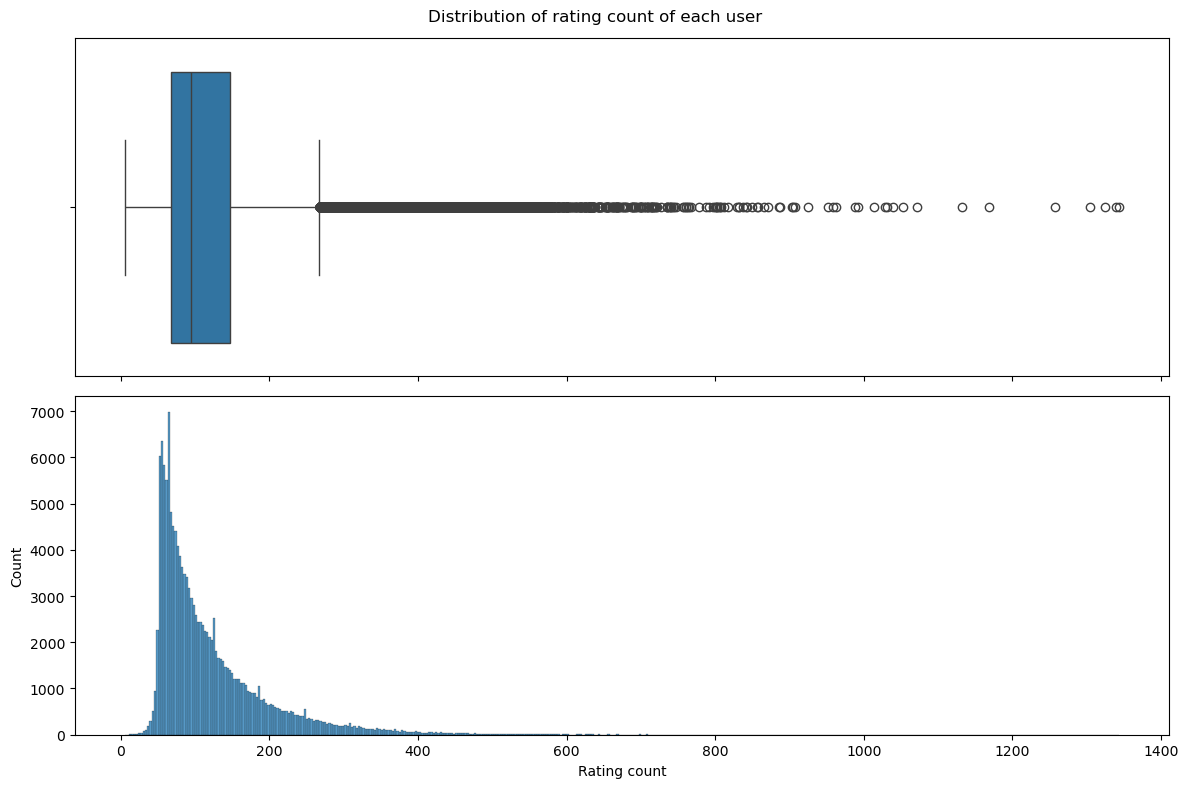

In [21]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
fig.suptitle("Distribution of rating count of each user")

ax = axes[0]
sns.boxplot(no_of_rating_per_users, ax=ax, orient='h')

ax = axes[1]
sns.histplot(no_of_rating_per_users, ax=ax)

fig.tight_layout()
plt.show()

**Comment:**

- We can see that the distribution of rating count is highly skewed and most normal users only rated about less than 300 movies.
- For larger count, there're a notable amount of outliers or extreme values correspond to people who rated alot of movies, they seem to be spammers or bots since a normal person doesn't watch or rate that many movies.

#### Number of Ratings per Movie

In [22]:
unrated_movies = df_ratings_movies_summary[df_ratings_movies_summary['Rating_Count'] == 0]
unrated_pct = unrated_movies.shape[0] / df_movie.shape[0] * 100
print(f"Number of unrated movies: {unrated_movies.shape[0]} ({unrated_pct:.2f}%)")

Number of unrated movies: 16420 (92.40%)


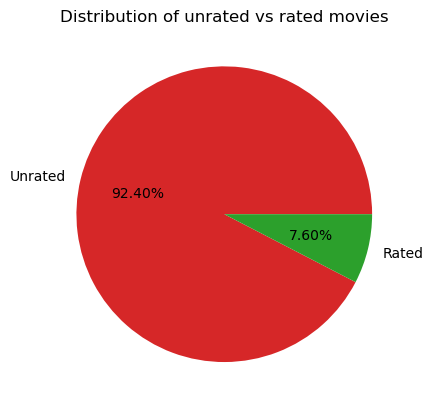

In [23]:
pie_data = [unrated_pct, 100 - unrated_pct]
plt.title("Distribution of unrated vs rated movies")
plt.pie(pie_data, labels = ['Unrated', 'Rated'], colors=['tab:red', 'tab:green'], autopct='%.2f%%')
plt.show()

**Comment:**

- There're __16420__ movies that are not rated by any users, which is approximately __92%__ movies in entire dataset.

- This is not good since most movies won't be helpful for our analysis. However, this is quite normal in practice as most of these films are outdated and not all films are popular resulting in little reviews.

Rated movies analysis

In [24]:
rated_movies = df_ratings_movies_summary[df_ratings_movies_summary['Rating_Count'] != 0]
rated_movies['Rating_Count'].describe()

count      1350.000000
mean      12842.561481
std       17805.334719
min        1042.000000
25%        2607.750000
50%        5229.000000
75%       14792.000000
max      117075.000000
Name: Rating_Count, dtype: float64

**Comment:**

- There are `1350` movies who have rated at least one.
- On average, a movie has rated by `12843` users.
- The standard deviation is approximately `17805`, which indicates a significant variation in the number of ratings received by different movies.
- The range of rating of a movie is between `1042 and 14792`. The min count of 1042 is quite higher than expected.
- The median movie has received `5229` ratings. This means that half of the movies have received more than 5,229 ratings and half have received fewer. (see same for `25%` and `75%`)

Let's plot their distribution to see that more clearly

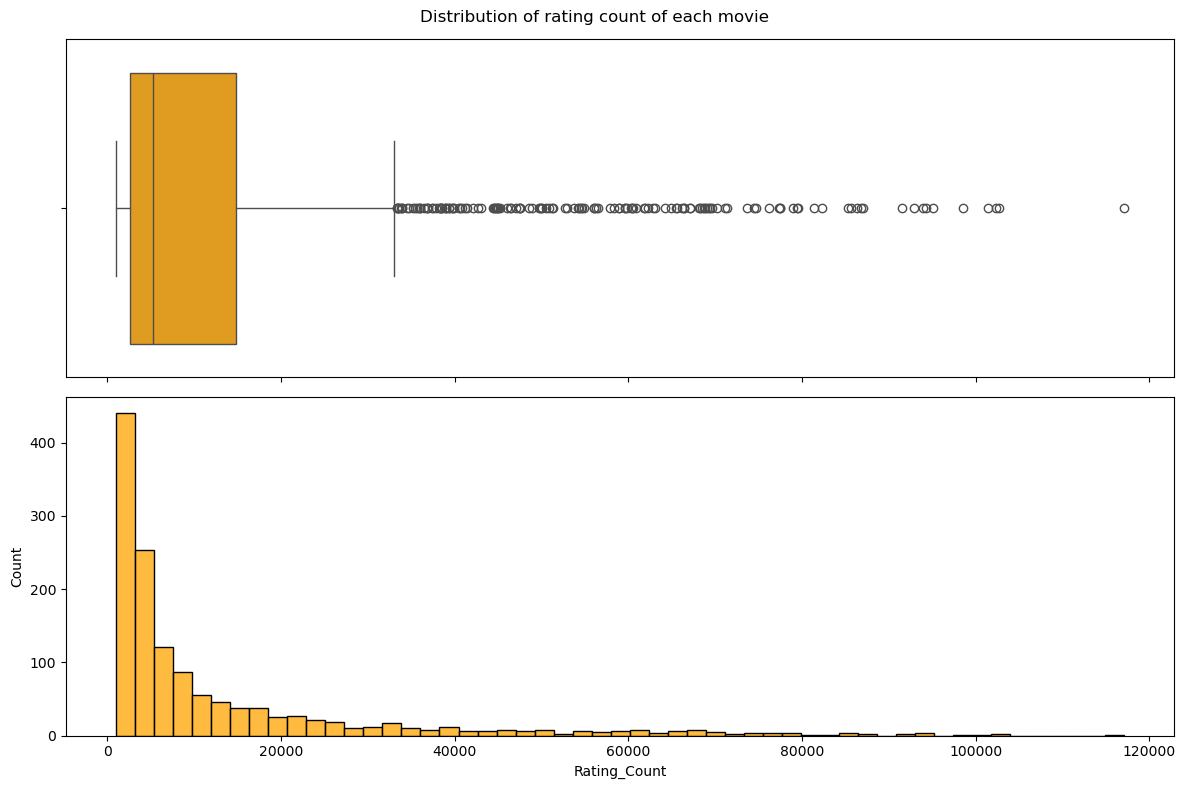

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
fig.suptitle("Distribution of rating count of each movie")

ax = axes[0]
sns.boxplot(rated_movies['Rating_Count'], ax=ax, orient='h', color='orange')

ax = axes[1]
sns.histplot(rated_movies['Rating_Count'], ax=ax, color='orange')

fig.tight_layout()
plt.show()

**Comment:**

- Same as the user rating count, the above distribution is also highly right-skewed with most of movies only receive about 200.000 ratings.
- There are a few movies that receive a huge amount of rating, which is likely due to their popularity.

#### Analysis of movie rating scores distribution

In [26]:
# get rating amount of each rating score
data = df_rating.groupby('Rating')['Movie_ID'].agg('count')
data.sort_index()

Rating
1     721356
2    1759281
3    5185650
4    5901368
5    3769803
Name: Movie_ID, dtype: int64

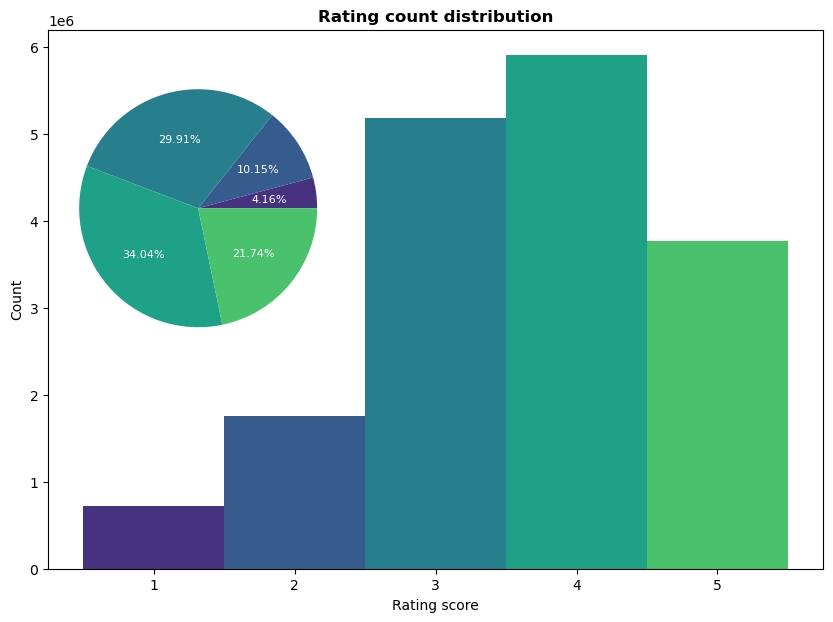

In [27]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("Rating count distribution", fontweight='bold')

ax.bar(data.index, data, color=sns.color_palette('viridis'), width=1.0)
ax.set_xlabel("Rating score")
ax.set_ylabel("Count")
x_pos = 0.15
y_pos = 0.5
ax_pie = fig.add_axes([x_pos, y_pos, 0.25, 0.25])
ax_pie.pie(data, radius=1.7, colors=sns.color_palette('viridis'), 
           autopct='%.2f%%', textprops={'color': 'white', 'size': 8})

plt.show()

**Comment:**

- It seems that the majority of people tend to rate movies more positively, as we can see that most ratings are above average (from 3 and above). The most common rating is 4, followed by 3, 5, 2, 1.

- The reason for the dominant of the rating of 4 may come from many reasons. Our guess is that even if they truly enjoy a movie, they often reserve the highest rating (5) for films they consider perfect. As for movies they dislike, they typically give a moderate score, rarely rating too low unless it's for movies they find truly unpleasant and a waste of time.

Next, let's analyze the average rating score distribution for movies

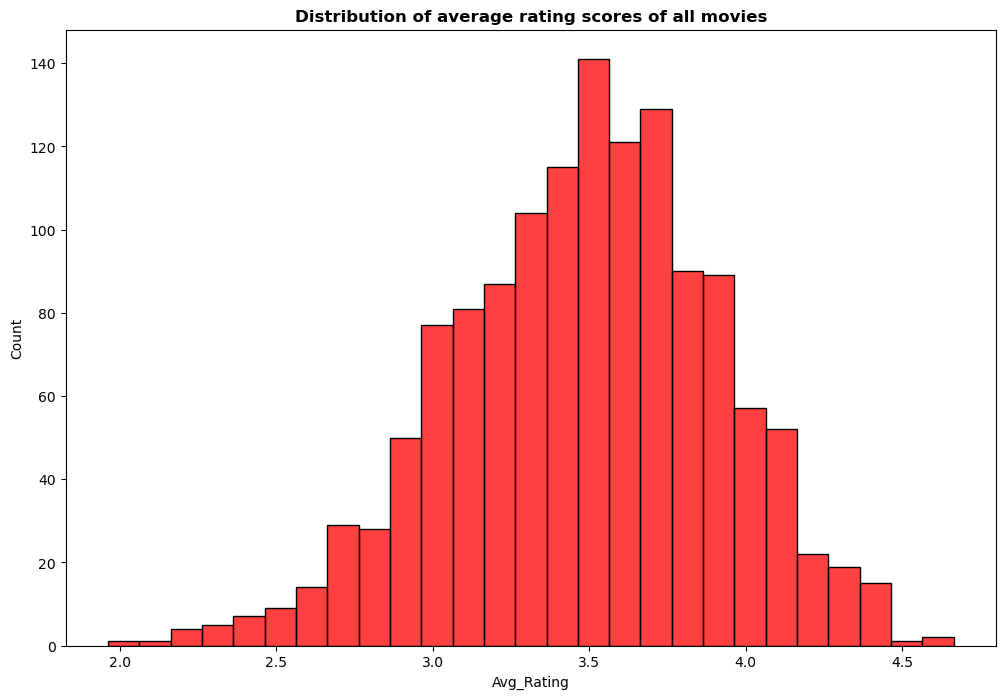

In [28]:
plt.figure(figsize=(12,8))
plt.title("Distribution of average rating scores of all movies", fontweight='bold')
# ignore movies with no rating
sns.histplot(data=rated_movies['Avg_Rating'], color='r')
plt.show()

**Comment:**

- In contrast to the distribution of rating counts, we can observe that the distribution of this variable nearly follows a _normal_ distribution, with relatively little skewness and a relatively even spread on both sides with minimal fluctuation. This suggests that the data has been processed quite well and aligns well with reality. However, we can see that the count units are still relatively small, which is due to the relatively low number of movies that have been rated compared to the remaining quantity.

- In detail, we can see most of the average ratings fall between `3.5 and 3.7` which can show that most of the movies have quite high average ratings. Very few movies have a low average score of `2.5 or less`, and even fewer movies has very high rating score as the amount of movies' score of `4.5 or higher` is very low. This is expected since people are more likely to rate a movie higher than expected (as we've explained above).

#### Distribution of Movie Releases Year-wise

In [29]:
data = df_movie['Year'].value_counts()

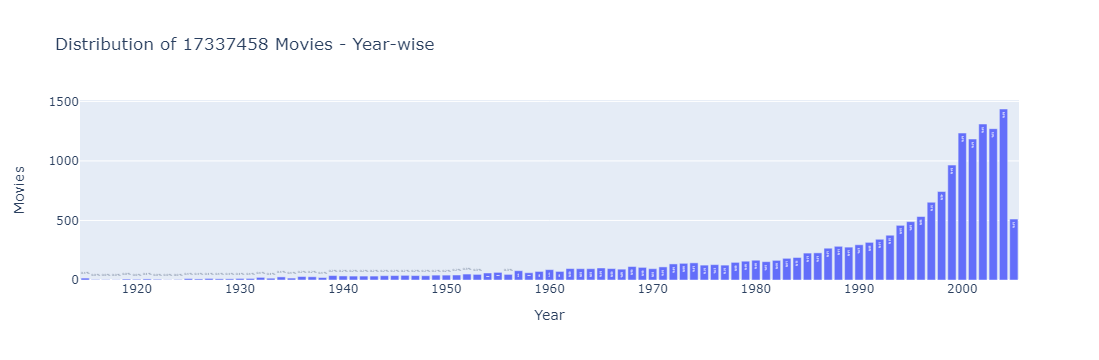

In [30]:
trace = go.Bar(x = data.index,y = data.values,text = ['{:.1f} %'.format(val) for val in (data.values / df_movie.shape[0] * 100)],textposition = 'auto')

layout = dict(title = 'Distribution of {} Movies - Year-wise'.format(df_rating.shape[0]), xaxis = dict(title = 'Year'), yaxis = dict(title = 'Movies'))

fig = go.Figure(data=[trace], layout=layout)

iplot(fig)

**Comment:** 
- As we can see, the number of movies tends to increase over the years.
- The highlight was at the beginning of the `21st` century and peaked in `2004` with `1436` films.
- But suddenly there was a significant decrease in `2005` indicating a significant decline or possibly due to insufficient data collection starting in 2005.

As `2004` is the year with the largest number of movies in the dataset. Let's analyze the rating distribution this year.

In [31]:
df_2004 = df_movie[df_movie['Year']==2004]
df_2004 = df_2004.merge(df_rating,on='Movie_ID')
data = df_2004['Rating'].value_counts().sort_index()

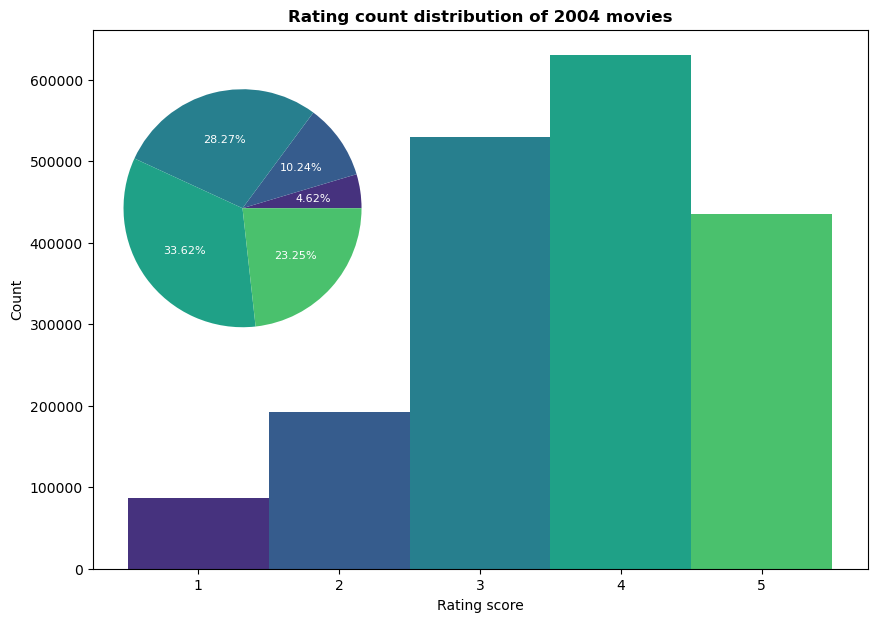

In [32]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("Rating count distribution of 2004 movies", fontweight='bold')

ax.bar(data.index, data, color=sns.color_palette('viridis'), width=1.0)
ax.set_xlabel("Rating score")
ax.set_ylabel("Count")
x_pos = 0.15
y_pos = 0.5
ax_pie = fig.add_axes([x_pos, y_pos, 0.25, 0.25])
ax_pie.pie(data, radius=1.7, colors=sns.color_palette('viridis'), 
           autopct='%.2f%%', textprops={'color': 'white', 'size': 8})

plt.show()

**Comment:** 

- We can see a similar trend of the rating distribution chart over the years above, in this chart the majority of ratings fall from `level 3 or higher`, with the highest at level `4` with `33.6%` of ratings, followed by level `3 and 5` corresponds to `28.3% and 23.2%` and then 2, 1.

- Moreover, the rating trend of this year don't change much suggests that the rating behavior of movie viewers has not changed much over the years; they still prefer to rate movies with higher scores than expected. Unless, it could be explained by the fact that the quality of movies has been improving over the years, resulting in an increase in the number of movies with average or high score, and vice versa.

#### Distribution of Ratings for the Most Rated (Popular) Movie

In [33]:
# get most rated movie
most_rated_movie_id = df_ratings_movies_summary[df_ratings_movies_summary['Rating_Count'] == df_ratings_movies_summary['Rating_Count'].max()].index[0]

df_max_ratings = df_rating[df_rating['Movie_ID'] == most_rated_movie_id]

name_max_ratings = df_movie.loc[most_rated_movie_id][['Name']].to_string(index=False)

data = df_max_ratings['Rating'].value_counts().sort_index()

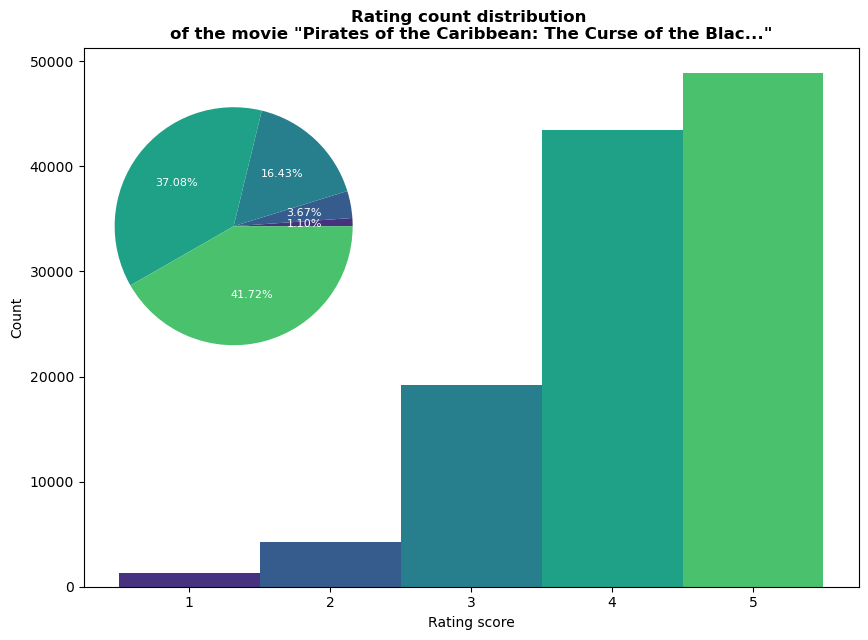

In [34]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title(f'Rating count distribution \nof the movie "{name_max_ratings}"', fontweight='bold')

ax.bar(data.index, data, color=sns.color_palette('viridis'), width=1.0)
ax.set_xlabel("Rating score")
ax.set_ylabel("Count")
x_pos = 0.15
y_pos = 0.5
ax_pie = fig.add_axes([x_pos, y_pos, 0.25, 0.25])
ax_pie.pie(data, radius=1.7, colors=sns.color_palette('viridis'), 
           autopct='%.2f%%', textprops={'color': 'white', 'size': 8})

plt.show()

**Comment:** 

- As expected, movies that receive more ratings (`Pirates of the Caribbean: The Curse of the Black Pearl`) tend to have high quality, resulting in higher average scores and an increasing distribution of scores. Unlike the distribution of most other movies, in this case, a rating score of 5 is the most prevalent.

#### The most common words in movie titles

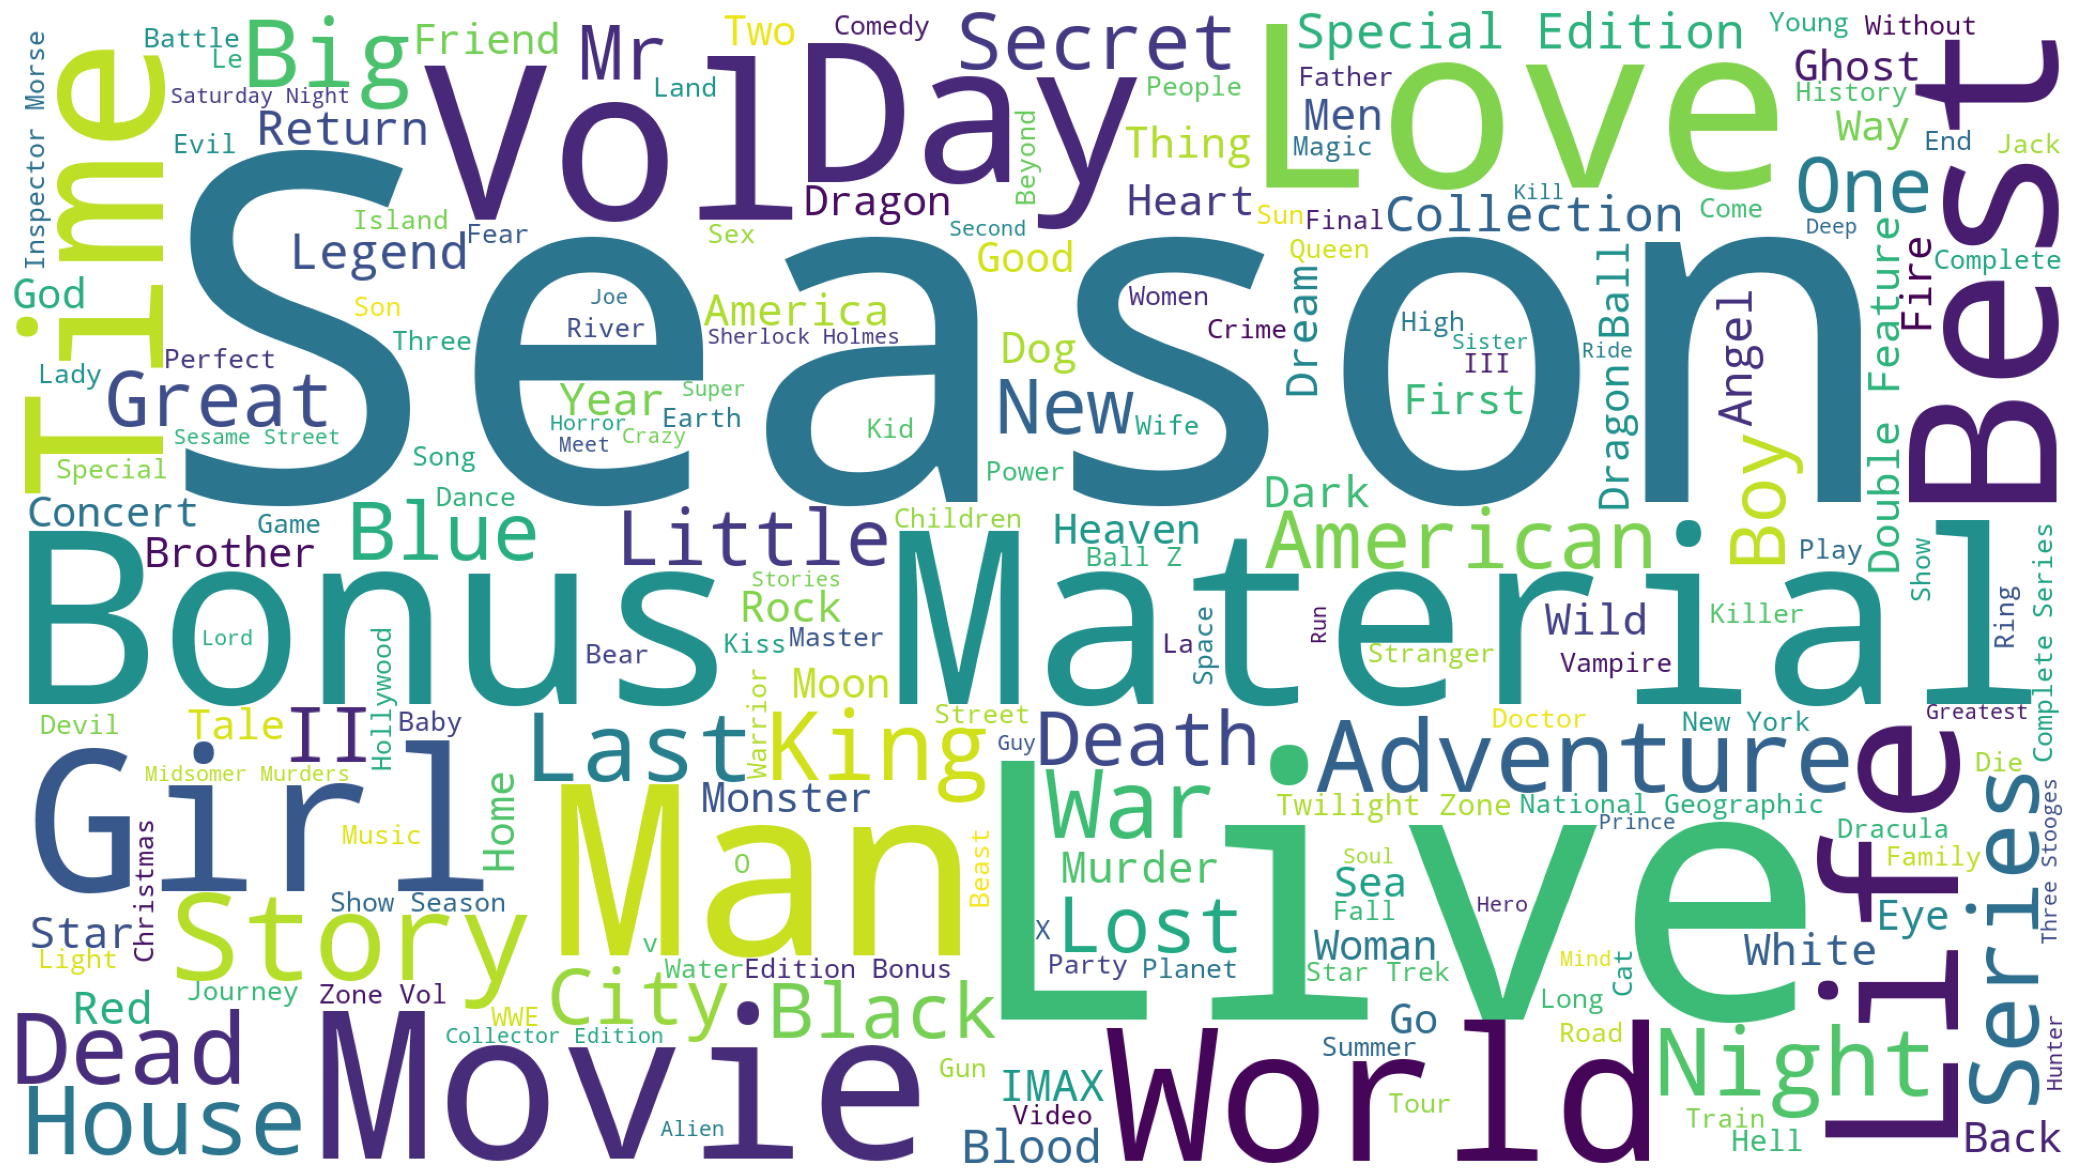

In [35]:
plt.subplots(figsize=(30,15))
wordcloud = WordCloud(
                          background_color='White',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_movie.Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Comment:**

The visual impact of the word cloud makes it easy to identify the most prominent topic of movie at a glance
- The most prominent words seem to be `Bonus`, `Material`, `Season`, `Love`, `Story`. This suggests that these themes are quite prevalent in this movie dataset. The high prevalence of those words indicates that many movies at that time often undergo extensive milking by splitting them into multiple parts to earn more money, or if a movie success, the likelihood of a sequel being released is very high.

- Words like `Adventure`, `Murder`, `Music`, `Comedy`, `Horror`, and `Concert` could indicate the high popularity `genres or types` of movies.

- `New York`, `East`, `America`, `Space`, and `Sea` could be potential movie locations that are used to attract people.

#### Analyze the relationship between the number of ratings and the average score of the movies.

Let's see if movies receive more ratings (more popular) have higher average rating score.

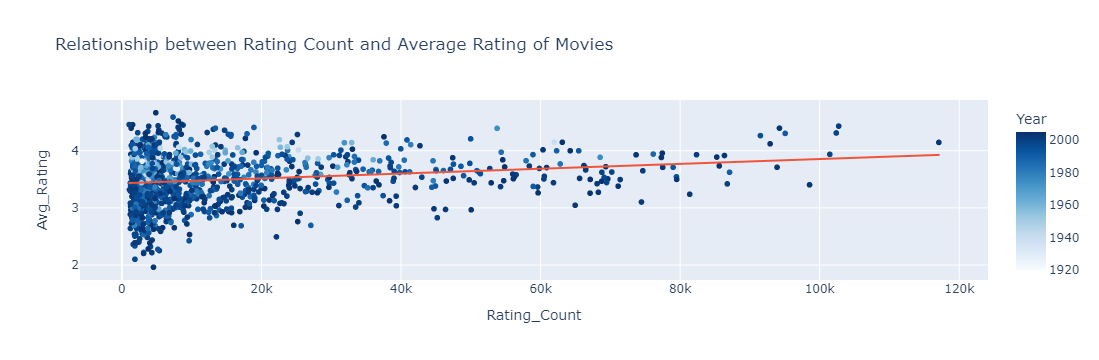

In [36]:
fig = px.scatter(data_frame=rated_movies, x='Rating_Count', y='Avg_Rating', 
                 hover_name='Name', color='Year', trendline='ols', color_continuous_scale='blues',
                 title="Relationship between Rating Count and Average Rating of Movies")
fig.show()

**Comment:**

- In general, it seems that a high number of ratings (high popularity) does not necessarily indicate good quality for movies, as their positive correlation appears to be quite weak.

- We can also observe that in less popular movies (lower rating count), it seems to be a significant fluctuation in their average scores, indicating unstable quality. However, this occurs in contrast to highly rated movies, where they exhibit more stable quality, and most popular movies tend to have above-average quality.

- Additionally, older or longer-standing movies appear to receive higher scores, but are less frequently rated, possibly due to their lower popularity. Therefore, we cannot conclude that older movies have better quality than modern ones yet (due to [survivorship bias](https://en.wikipedia.org/wiki/Survivorship_bias)).

#### Top 10 most rated movies

In [37]:
top_rated = df_ratings_movies_summary.nlargest(10, 'Avg_Rating')
top_rated

Year                                           Name  Avg_Rating  \
Movie_ID                                                                    
3456      2004                                 Lost: Season 1    4.665432   
2102      1994                         The Simpsons: Season 6    4.589824   
3444      2004          Family Guy: Freakin' Sweet Collection    4.520766   
1476      2004                       Six Feet Under: Season 4    4.461601   
4238      2000                                      Inu-Yasha    4.457774   
2568      2004                        Stargate SG-1: Season 8    4.456026   
1256      1994                    The Best of Friends: Vol. 4    4.449168   
4427      2001                        The West Wing: Season 3    4.436258   
2452      2001  Lord of the Rings: The Fellowship of the Ring    4.431489   
1947      2002                        Gilmore Girls: Season 3    4.428943   

          Rating_Count  
Movie_ID                
3456              4860  
2102              7331  
3444              8090  
1476              8581  
4238              1042  
2568              1535  
1256              8774  
4427              5185  
2452            102721  
1947              3849

#### Top 10 most count reviews movies

In [38]:
top_reviewed = df_ratings_movies_summary.nlargest(10, 'Rating_Count')
top_reviewed

Year                                               Name  Avg_Rating  \
Movie_ID                                                                        
1905      2003  Pirates of the Caribbean: The Curse of the Bla...    4.146334   
2452      2001      Lord of the Rings: The Fellowship of the Ring    4.431489   
4306      1999                                    The Sixth Sense    4.311469   
571       1999                                    American Beauty    3.937733   
3860      2003                                     Bruce Almighty    3.404323   
2862      1991                           The Silence of the Lambs    4.303809   
3962      2003                          Finding Nemo (Widescreen)    4.395904   
4432      2003                                    The Italian Job    3.711533   
3938      2004                                            Shrek 2    4.121559   
2782      1995                                         Braveheart    4.265251   

          Rating_Count  
Movie_ID                
1905            117075  
2452            102721  
4306            102376  
571             101450  
3860             98545  
2862             95053  
3962             94235  
4432             93886  
3938             92893  
2782             91502

Let's see if there's any different between them

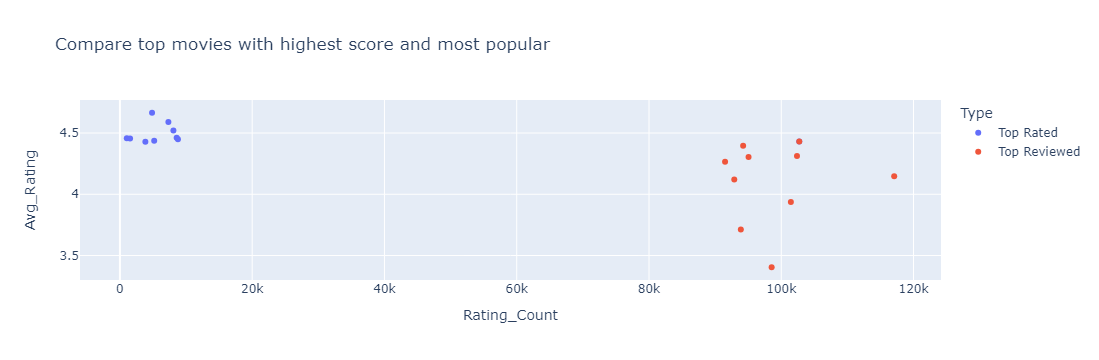

In [39]:
top_rated['Type'] = 'Top Rated'
top_reviewed['Type'] = 'Top Reviewed'

# Concatenate the two DataFrames
combined_df = pd.concat([top_rated, top_reviewed])

# Create the scatter plot
fig = px.scatter(data_frame=combined_df, x='Rating_Count', y='Avg_Rating', 
                 hover_name='Name', color='Type',
                 title="Compare top movies with highest score and most popular")
fig.show()

**Comment:**

- Firstly, we can observe that the top two groups of movies, with the highest ratings and the most reviews, are clearly in separate clusters. This has further indicated that popular movies do not necessarily have high quality, and vice versa.

- The top-rated movie or show is `Lost: Season 1` with an average rating of approximately `4.67`. However, it’s interesting to note that the highest-rated items are not necessarily the most reviewed. This could suggest that niche content can sometimes have higher ratings due to a dedicated fan base.

-  `Pirates of the Caribbean: The Curse of the Black Pearl` has the highest number of reviews, but its average rating is lower than the top-rated movies or shows. This could suggest that while it’s popular and widely watched, viewers' opinions on it vary more widely.

- `Lord of the Rings: The Fellowship of the Ring` stands out as it appears in both lists - it’s both one of the top-rated and most reviewed movies. This suggests that it’s both popular and highly regarded by viewers.

- There doesn’t seem to be a direct correlation between the number of reviews and the average rating. For instance, `Bruce Almighty` has a high number of reviews but a relatively lower average rating. This suggests that a high number of reviews does not necessarily mean a high rating and vice versa.

#### Analyze best movies each year

In [40]:
index_per_year = df_ratings_movies_summary.groupby('Year')['Avg_Rating'].idxmax()
highest_rating_df = df_ratings_movies_summary.loc[index_per_year]

# fill unrated movies with NaN
highest_rating_df['Avg_Rating'].where(highest_rating_df['Rating_Count'] != 0, None, inplace=True)

# Interpolate missing values
highest_rating_df.interpolate(inplace=True)

highest_rating_df

Year                       Name  Avg_Rating  Rating_Count
Movie_ID                                                           
3137      1915               Les Vampires         NaN             0
394       1916                         20         NaN             0
4188      1917          Slapstick Masters         NaN             0
237       1918            Broken Blossoms         NaN             0
5399      1919            Daddy Long Legs         NaN             0
...        ...                        ...         ...           ...
4427      2001    The West Wing: Season 3    4.436258          5185
1947      2002    Gilmore Girls: Season 3    4.428943          3849
3962      2003  Finding Nemo (Widescreen)    4.395904         94235
3456      2004             Lost: Season 1    4.665432          4860
3864      2005              Batman Begins    4.244315         37558

[91 rows x 4 columns]

In [41]:
all_years = highest_rating_df['Year']
avg_per_year = rated_movies.groupby("Year")['Avg_Rating'].mean()
avg_per_year.to_frame().reset_index()

avg_per_year = pd.merge(all_years, avg_per_year, how='left', on="Year")

# Interpolate missing values
avg_per_year.interpolate(inplace=True)
avg_per_year

Year  Avg_Rating
0   1915         NaN
1   1916         NaN
2   1917         NaN
3   1918         NaN
4   1919         NaN
..   ...         ...
86  2001    3.358450
87  2002    3.385606
88  2003    3.450955
89  2004    3.504436
90  2005    3.457625

[91 rows x 2 columns]

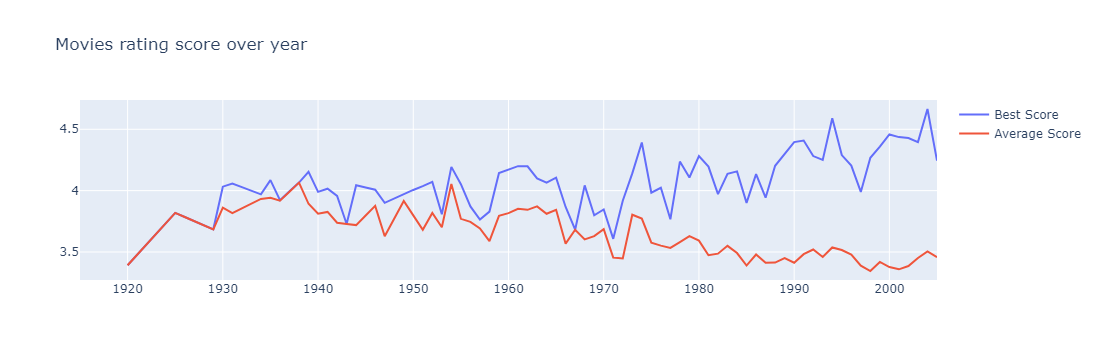

In [42]:
movies_rating_line = go.Scatter(x=highest_rating_df['Year'], y=highest_rating_df['Avg_Rating'],
                                mode='lines', hovertext=highest_rating_df['Name'],
                                name='Best Score')

# Create a scatter plot for Average Rating per Year using px.scatter
avg_rating_per_year_scatter = go.Scatter(x=avg_per_year['Year'], y=avg_per_year['Avg_Rating'],
                                         mode='lines',
                                         name='Average Score')

# Combine the two plots
fig = go.Figure(data=[movies_rating_line, avg_rating_per_year_scatter])

# Update layout with title
fig.update_layout(title="Movies rating score over year")

# Show the plot
fig.show()

**Comment:** 

- Firstly, it's worth noting that while the scores of the best films each year seem to be increasing, the average scores of all films in that year are decreasing, with the gap widening in subsequent years. This indicates that audiences today tend to be more critical of lower-quality films and are more supportive of standout ones, which is good as it indirectly helps improve the overall quality of films over time.

- Additionally, we can also observe greater fluctuations in the scores of the top films, indicating that audience movie tastes and their preference over movie genres, types are changing over time (as the genres of best movies are very different from each other).

- Specifically, the data shows a general trend of increasing ratings over the years, with the highest mean rating being `4.665` in `2004` for `Lost: Season 1`. However, there is a slight dip in the mean rating in `1997` for `Princess Mononoke` with a rating of `3.989`. This could be due to various factors such as changes in audience preferences, the quality of movies/series released that year, etc.

- The list includes a variety of content types, including movies like `Batman Begins` and `Princess Mononoke`, animated films like `Finding Nemo (Widescreen)`, and TV series like `Lost: Season 1` and `Friends: Season 6`. This indicates a diverse range of content that appeals to audiences over years.

#### Analyze movie title length

In [43]:
rated_movies['Movie Title Length'] = rated_movies['Name'].str.len()

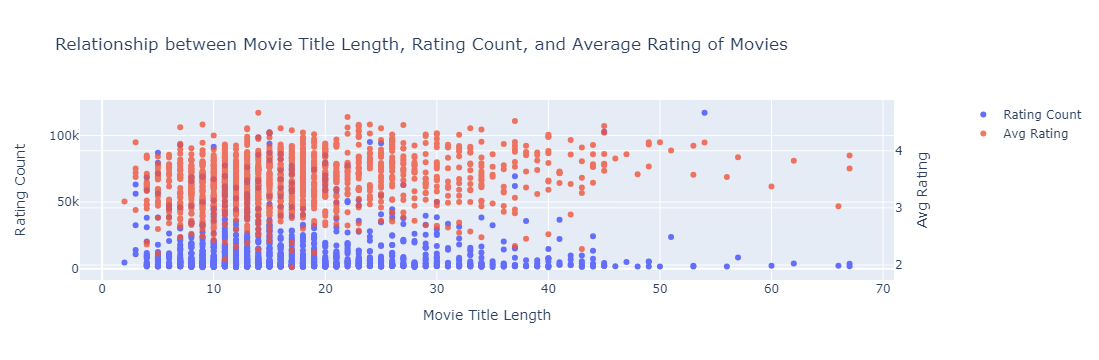

In [44]:
# Assuming rated_movies_summary is your DataFrame
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Scatter plot for Rating Count
scatter1 = go.Scatter(x=rated_movies['Movie Title Length'],
                      y=rated_movies['Rating_Count'],
                      mode='markers',
                      hovertext=rated_movies['Name'],
                      name='Rating Count',opacity=1)

fig.add_trace(scatter1, secondary_y=False)

# Scatter plot for Average Rating with secondary y-axis
scatter2 = go.Scatter(x=rated_movies['Movie Title Length'],
                      y=rated_movies['Avg_Rating'],
                      mode='markers',
                      hovertext=rated_movies['Name'],
                      name='Avg Rating', opacity=0.8)

fig.add_trace(scatter2, secondary_y=True)

fig.update_layout(
    title_text="Relationship between Movie Title Length, Rating Count, and Average Rating of Movies"
)

fig.update_xaxes(title_text="Movie Title Length")
fig.update_yaxes(title_text="Rating Count", secondary_y=False)
fig.update_yaxes(title_text="Avg Rating", secondary_y=True)


# Show the plot
fig.show()

**Comment:** 

- There appears to be a `slight positive correlation` between the `length of a movie’s title` and its `average rating`. This means that movies with longer titles tend to have slightly higher ratings. However, this correlation is not strong, and there are many exceptions. For `rating count`, the relationship appears even weaker.

- There are a few movies with particularly long titles can be up to `66, 67` characters. It would be interesting to investigate these further to see if they share any common characteristics besides having long titles. Same for movies with very short titles such as `10`, `Saw`, `K-9`, `Elf`... Movies with extremely short or extremely long titles like this can give viewers a first impression because they will stimulate curiosity, but it seems that what mainly determines the popularity or scores is still largely depends on their quality instead of just the movie title.

### 4. Insights

After analyzing this Netflix Movie Rating Dataset, here are some insights that could be useful or interesting:


1. A user in this dataset rated at least 5 movies, which is rather normal. On average, a user has rated about `121` movies with a significant variation in the number of movies rated by different users.

2. Distribution of rating count is highly skewed and most normal users only rated about less than 300 movies.

3. There're __16420__ movies that are unrated, which is approximately __92%__ total of movies in entire dataset.

4. The range of rating of a movie is between `1042 and 14792` with a standard deviation of approximately `17805`.

5. The distribution of movie ratings is also highly right-skewed with most of movies only receive about 200.000 ratings. There are a few movies that receive a huge amount of rating, which is likely due to their popularity.

6. The majority of people tend to rate movies more positively, since most ratings are above average (from 3 and above).

7. That the distribution of average rating scores nearly follows a _normal_ distribution, with relatively little skewness and a relatively even spread on both sides with minimal fluctuation.

8. The number of movies tends to increase over the years. The highlight was at the beginning of the `21st` century and peaked in `2004` with `1436` films.

9. The rating trend of the year with most movies don't change much suggests that the rating behavior of movie viewers has not changed much over the years.

10. Movies that receive the top ratings (`Pirates of the Caribbean: The Curse of the Black Pearl`) tend to have high quality, resulting in higher average scores and an increasing distribution of scores.

11. The most prominent words seem to be `Bonus`, `Material`, `Season`, `Love`, `Story`. Words like `Adventure`, `Murder`, `Music`, `Comedy`, `Horror`, and `Concert` could indicate the high popularity `genres or types` of movies. `New York`, `East`, `America`, `Space`, and `Sea` could be potential movie locations that are used to attract people.

12. It seems that a high number of ratings (high popularity) does not necessarily indicate good quality for movies. Less popular movies (lower rating count) have significant fluctuation in their average scores, indicating unstable quality, contrast to highly rated movies. Additionally, older or longer-standing movies appear to receive higher scores, but are less frequently rated.

13. The top two groups of movies, with the highest ratings and the most reviews, are clearly separated, which has further indicated that popular movies do not necessarily have high quality, and vice versa. The top-rated movie or show is `Lost: Season 1`, `Pirates of the Caribbean: The Curse of the Black Pearl` has the highest number of reviews, but its average rating is lower than the top-rated movies or shows. `Lord of the Rings: The Fellowship of the Ring` stands out as it appears in both lists.

14. The scores of the best films each year seem to be increasing while the average scores of all films in that year are decreasing, with the gap widening in subsequent years. Additionally, we can also observe greater fluctuations in the scores of the top films, indicating that audience movie tastes and their preference over movie genres, types are changing over time (as the genres of best movies are very different from each other).

15. The relationships between movie title length, popularity or score are not strong, and not worth to consider, it seems that what mainly determines the popularity or scores is still largely depends on their quality instead of just the movie title.

### 5. References

[1] [Netflix Movie Rating Dataset from Kaggle](https://www.kaggle.com/datasets/rishitjavia/netflix-movie-rating-dataset/data)

[2] https://www.kaggle.com/code/ragnarok007/uas-ai-grup-a-netflix

[3] https://www.kaggle.com/code/rishitjavia/movie-recommendation-using-netflix-movie-reviews#3.-Analyze-Data

[4] [Storytelling with data book](https://github.com/Saurav6789/Books-/blob/master/storytelling-with-data-cole-nussbaumer-knaflic.ptrain_df)

---
## <center>THE END</center>

## <center>THANK YOU</center>